In [23]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions,TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [24]:
dataset = pd.read_csv("Market_Basket_Optimisation.csv",header = None)
transaction = []
for i in range(len(dataset)):
    transaction.append([str(dataset.values[i,j]) for j in range(0,len(dataset.iloc[0]))])

In [25]:
oht = TransactionEncoder()
oht_ary = oht.fit(transaction).transform(transaction)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [61]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

In [62]:
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [63]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head

<bound method NDFrame.head of              antecedents           consequents  antecedent support  \
0            (chocolate)       (mineral water)            0.163845   
1        (mineral water)           (chocolate)            0.238368   
2            (spaghetti)       (mineral water)            0.174110   
3        (mineral water)           (spaghetti)            0.238368   
4       (chocolate, nan)       (mineral water)            0.163845   
5   (mineral water, nan)           (chocolate)            0.238235   
6            (chocolate)  (mineral water, nan)            0.163845   
7        (mineral water)      (chocolate, nan)            0.238368   
8       (spaghetti, nan)       (mineral water)            0.174110   
9   (mineral water, nan)           (spaghetti)            0.238235   
10           (spaghetti)  (mineral water, nan)            0.174110   
11       (mineral water)      (spaghetti, nan)            0.238368   

    consequent support   support  confidence      lift  lev

In [64]:
from mlxtend.frequent_patterns import association_rules

In [65]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,"(chocolate, nan)",(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357


In [66]:
support=rules['support'].values
confidence=rules['confidence'].values

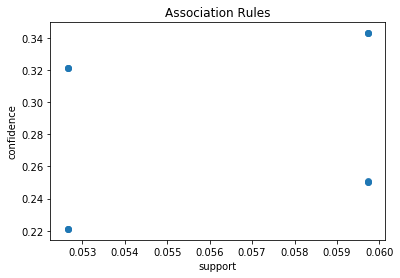

In [88]:
import seaborn as sns1
 
for i in range (len(support)):
    support[i] = support[i] 
    confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)
plt.show()

In [67]:
import random
import matplotlib.pyplot as plt

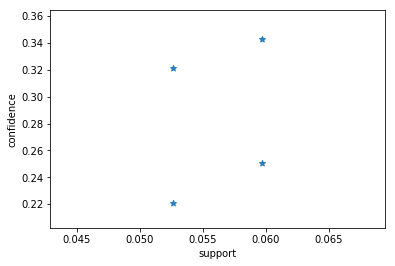

In [68]:
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [69]:
import numpy as np

In [89]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   

    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])

        for a in rules.iloc[i]['antecedents']:

            G1.add_nodes_from([a])

            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

        for k in rules.iloc[i]['consequents']:

                G1.add_nodes_from([k])

                G1.add_edge("R"+str(i), k, color=colors[i],  weight=2)

        for node in G1:
            found_a_string = False
            for item in strs: 
                if node==item:
                    found_a_string = True
            if found_a_string:
                color_map.append('yellow')
            else:
                color_map.append('green')       
                
        edges = G1.edges()
        colors = [G1[u][v]['color'] for u,v in edges]
        weights = [G1[u][v]['weight'] for u,v in edges]

        pos = nx.spring_layout(G1, k=16, scale=1)
        nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

        for p in pos:  # raise text positions
            pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        plt.show()

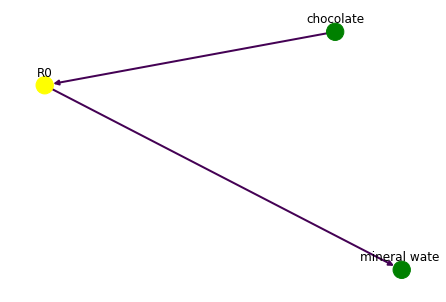

ValueError: 'c' argument has 7 elements, which is not acceptable for use with 'x' with size 4, 'y' with size 4.

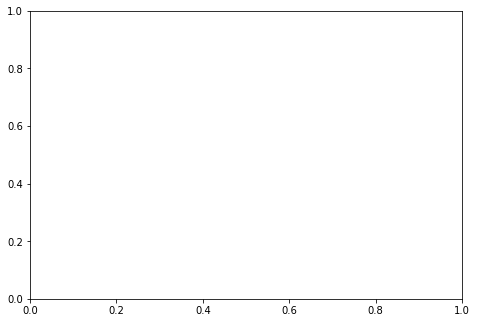

In [91]:
draw_graph(rules, 10)

In [75]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,"(chocolate, nan)",(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,"(mineral water, nan)",(chocolate),0.238235,0.163845,0.052660,0.221041,1.349087,0.013626,1.073426
6,(chocolate),"(mineral water, nan)",0.163845,0.238235,0.052660,0.321400,1.349087,0.013626,1.122553
7,(mineral water),"(chocolate, nan)",0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
8,"(spaghetti, nan)",(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
9,"(mineral water, nan)",(spaghetti),0.238235,0.174110,0.059725,0.250699,1.439890,0.018246,1.102215
